In [1]:
from pymatgen.io.vasp import Xdatcar
import numpy as np

from polyhedral_analysis.trajectory import Trajectory
from polyhedral_analysis.polyhedra_recipe import PolyhedraRecipe, create_matching_site_generator
from polyhedral_analysis.rotation_analyser import RotationAnalyser

import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
ps4_recipe = PolyhedraRecipe(central_atoms='P', vertex_atoms='S', method='nearest neighbours',
                            n_neighbours=4)
ges4_recipe = PolyhedraRecipe(central_atoms='Ge', vertex_atoms='S', method='nearest neighbours',
                             n_neighbours=4)

trajectory = Trajectory.from_xdatcars( filenames=['data/1000K/Ge/1/XDATCAR',
                                                  'data/1000K/Ge/2/XDATCAR',
                                                  'data/1000K/Ge/3/XDATCAR',
                                                  'data/1000K/Ge/4/XDATCAR',
                                                  'data/1000K/Ge/5/XDATCAR'], 
                                       recipes=[ps4_recipe, ges4_recipe], 
                                       progress=True,
                                       ncores=4 )

100%|██████████| 9924/9924 [04:30<00:00, 36.66 configurations/s] 


In [3]:
reference_points = np.array([[1.0, -1.0, 1.0],
                             [-1.0, -1.0, -1.0],
                             [1.0, 1.0, -1.0],
                             [-1.0, 1.0, 1.0]])
reference_points.shape

all_points = np.array([reference_points, reference_points*(-1)])
all_points.shape

inv_all_points = np.array([reference_points*(-1), reference_points])
inv_all_points.shape

ra = RotationAnalyser(reference_points=all_points)
inv_ra = RotationAnalyser(reference_points=inv_all_points)

In [4]:
import math

type_0 = [2,3,4,5]
all_orientations = []
all_angles = []
all_reference = []

type_1 = [0,1,6,7]
inv_all_orientations = []
inv_all_angles = []
inv_all_reference = []

for i in tqdm(type_0):
    angles = []
    orientations = []
    reference = []
    for c in trajectory.configurations:
        po = ra.polyhedron_orientation( c.polyhedra[i] )
        angles.append(po['rotational_distance'])
        orientations.append(po['orientation_index'])
        reference.append(po['reference_geometry_index'])
    all_orientations.append(orientations)
    all_angles.append(angles)
    all_reference.append(reference)
all_orientations = np.array(all_orientations)
all_angles = np.array(all_angles)*180.0/math.pi
all_reference = np.array(all_reference)

for i in tqdm(type_1):
    angles = []
    orientations = []
    reference = []
    for c in trajectory.configurations:
        po = inv_ra.polyhedron_orientation( c.polyhedra[i] )
        angles.append(po['rotational_distance'])
        orientations.append(po['orientation_index'])
        reference.append(po['reference_geometry_index'])
    inv_all_orientations.append(orientations)
    inv_all_angles.append(angles)
    inv_all_reference.append(reference)
inv_all_orientations = np.array(inv_all_orientations)
inv_all_angles = np.array(inv_all_angles)*180.0/math.pi
inv_all_reference = np.array(inv_all_reference)

100%|██████████| 4/4 [04:24<00:00, 66.07s/it]


In [5]:
from skimage.util import view_as_windows

def smooth_data(a, n):
    return np.array([ np.argmax(np.bincount(window)) for window in view_as_windows(a,n) ])

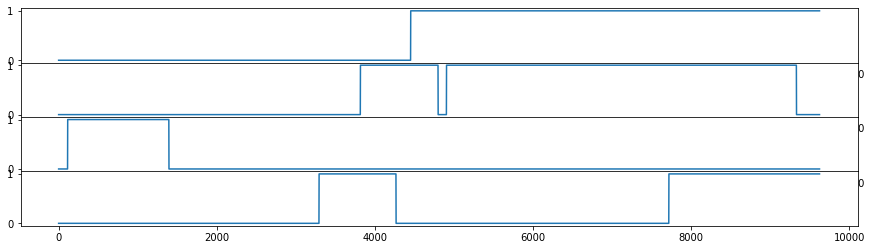

In [6]:
n = 4
smoothed_data = [smooth_data(all_reference[i], 200) for i in range(4)]
sosmooth_data = [smooth_data(smoothed_data[i], 100) for i in range(4)]
f, ax = plt.subplots(n, 1, sharey=True, figsize=(15,n), gridspec_kw={'hspace': 0})
for axis, o in zip(ax, sosmooth_data):
#     axis.plot(np.not_equal(o[:-1],o[1:]), 'o')
    axis.plot(o)
plt.savefig('GeS_1000K_ref0.png', dpi=300)

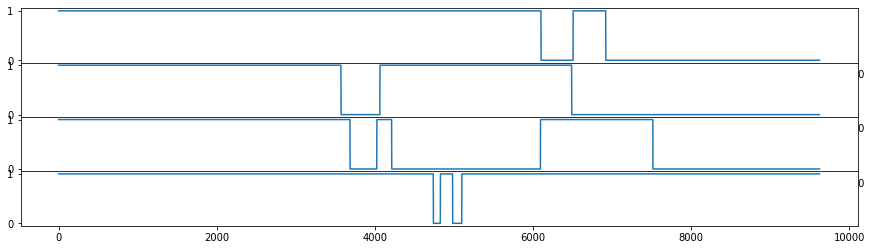

In [7]:
n = 4
smoothed_data = [smooth_data(inv_all_reference[i], 200) for i in range(4)]
sosmooth_data = [smooth_data(smoothed_data[i], 100) for i in range(4)]
f, ax = plt.subplots(n, 1, sharey=True, figsize=(15,n), gridspec_kw={'hspace': 0})
for axis, o in zip(ax, sosmooth_data):
#     axis.plot(np.not_equal(o[:-1],o[1:]), 'o')
    axis.plot(o)
plt.savefig('GeS_1000K_ref1.png', dpi=300)

In [8]:
ps4 = [0,1,2,3,4,5,6,7]
rotation_count = 0
ps4_poly = 0 
for n in ps4:
    for j, k in enumerate(all_orientations[n]):
        if j == len(all_orientations[n]) - 1:
            ps4_poly += 1
            if k != all_orientations[n][j-1]:
                rotation_count += 1
                print('Last number change')
        elif j == 0:
            pass
        elif k == all_orientations[n][j+1] and k != all_orientations[n][j-1]:
            rotation_count += 1
#             print('Change')
#             print('new', k)
#             print('prev', all_orientations[n][j-1])
#             print('poly', n)
#             print('step', j)
print('Rotation Count', rotation_count)
print('Total Poly', ps4_poly)
print('Mean Rotation Frequency', rotation_count/total_poly/100, 'ps-1')
# f = open("rotation.dat", "w+")
# f.write(f"rotation count 
# f.write("ps4_poly " + str(ps4_poly))
# f.write("mean rotation frequency " + str(total_mean_rot))
# f.close()

IndexError: index 4 is out of bounds for axis 0 with size 4

In [ ]:
ps4 = [0,1,2,3,4,5,6,7]
reference_count = 0
ps4_poly = 0 
for n in ps4:
    for j, k in enumerate(all_reference[n]):
        if j == len(all_reference[n]) - 1:
            ps4_poly += 1
            if k != all_reference[n][j-1]:
                reference_count += 1
                print('Last number change')
        elif j == 0:
            pass
        elif k == all_reference[n][j+1] and k != all_reference[n][j-1]:
            reference_count += 1
#             print('Change')
#             print('new', k)
#             print('prev', all_reference[n][j-1])
#             print('poly', n)
#             print('step', j)
print('Reference changes', reference_count)
print('Total poly', ps4_poly)
print('Mean Reference Change Frequency', reference_count/total_poly/100, 'ps-1')

In [ ]:
type_1 = [0,1,6,7]
type_1_rotation_count = 0
type_1_poly = 0
for n in type_1:
    for j, k in enumerate(all_orientations[n]):
        if j == len(all_orientations[n]) - 1:
            type_1_poly += 1
            if k != all_orientations[n][j-1]:
                type_1_rotation_count += 1
                print('Last number change')
        elif j == 0:
            pass
        elif k == all_orientations[n][j+1] and k != all_orientations[n][j-1]:
            type_1_rotation_count += 1
#             print('Change')
#             print('new', k)
#             print('prev', all_orientations[n][j-1])
#             print('poly', n)
#             print('step', j)
print('Type 1 Orientation Changes', type_1_rotation_count)
print('Type 1 poly', type_1_poly)
print('Mean Type 1 Rotation Frequency', type_1_rotation_count/type_1_poly/100, 'ps-1')

In [ ]:
type_0 = [2,3,4,5]
type_0_rotation_count = 0
type_0_poly = 0
for n in type_0:
    for j, k in enumerate(all_orientations[n]):
        if j == len(all_orientations[n]) - 1:
            type_0_poly += 1
            if k != all_orientations[n][j-1]:
                type_0_rotation_count += 1
                print('Last number change')
        elif j == 0:
            pass
        elif k == all_orientations[n][j+1] and k != all_orientations[n][j-1]:
            type_0_rotation_count += 1
#             print('Change')
#             print('new', k)
#             print('prev', all_orientations[n][j-1])
#             print('poly', n)
#             print('step', j)
print('Type 0 Orientation Changes', type_0_rotation_count)
print('Type 0 poly', type_0_poly)
print('Mean Type 0 Rotation Frequency', type_0_rotation_count/type_0_poly/100, 'ps-1')

In [ ]:
ps4 = [0,1,2,3,4,5,6,7]
time_0 = 0
time_1 = 0
for n in ps4:
    for j, k in enumerate(all_reference[n]):
        if k == 0:
            time_0 += 1
        elif k == 1:
            time_1 += 1
print('Time in ground state', time_0 * 2, 'fs')
print('Time in excited state', time_1 * 2, 'fs')

In [119]:
ps4 = [0,1,2,3,4,5,6,7]
rotation_count = 0
ps4_poly = 0 
for n in ps4:
#     print(n)
    smooth = smooth_data(all_orientations[n], 200)
    sosmooth = smooth_data(smooth, 100)
    for j, k in enumerate(sosmooth):
        if j == len(sosmooth) - 1:
            ps4_poly += 1
        elif j == 0:
            pass
        elif k == sosmooth[j+1] and k != sosmooth[j-1]:
            rotation_count += 1
#             print('Change')
#             print('new', k)
#             print('prev', all_orientations[n][j-1])
#             print('poly', n)
#             print('step', j)
print(rotation_count)
print(rotation_count/ps4_poly/100)

69
0.08625
